## [Göğüs Kanseri Veri Setini Anlamak - Daha fazla bilgi için tıklayın.](https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original)
### Veri Seti Genel Bilgileri:
- Örnek Sayısı: 699
- Özellik Sayısı: 9
- Eksik Veri Durumu: Var
### Ek Değişken Bilgileri:
Sıra_No [Kısaltması] Öznitelik_adı--->Değer_aralığı
1. **Sample code number (Numara):** --->kimlik_numarası
2. **Clump Thickness (Yığın Kalınlığı):** --->[1 - 10]
3. **Uniformity of Cell Size (Hücre Boyutunun Eşbiçimliliği):** --->[1 - 10]
4. **Uniformity of Cell Shape (Hücre Şekil Eşbiçimliliği):** --->[1 - 10]
5. **Marginal Adhesion (Marjinal Yapışma):** --->[1 - 10]
6. **Single Epithelial Cell Size (Tek Epitel Hücre Boyutu):** --->[1 - 10]
7. **Bare Nuclei (Çıplak Çekirdekler):** --->[1 - 10]
8. **Bland Chromatin (Yumuşak Kromatin):** --->[1 - 10]
9. **Normal Nucleoli(Normal Nükleoli):** --->[1 - 10]
10. **Mitoses (Mitoz):** --->[1 - 10]
11. **Class (Sınıf):** --->(2=İyi Huylu, 4=Kötü Huylu)

## Daha Çok Bilgi/Makale:
* [Meme Kanseri Tanısı İçin Özniteliklerin Öneminin Değerlendirilmesi Üzerine Bir
Çalışma](https://dergipark.org.tr/en/download/article-file/519015)
* [webmd.com - Breast Cancer: Symptoms, Causes, Treatment](https://www.webmd.com/breast-cancer/understanding-breast-cancer-basics)
* [On the Bias of Precision Estimation Under Separate Sampling](https://journals.sagepub.com/doi/pdf/10.1177/1176935119860822)

In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
dataset= pd.read_csv("breastCancer.csv")
dataset.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [69]:
#sonraki kullanımlarda ve okunmalarda kolaylık sağlanması açısından özelliklerin isimleri yukarda belirtilmiş şekilde kısa türkçe karşılıkları ile değiştirildi
dataset.columns= ["numara", "yigin_kalinligi", "hucre_boyutu_esbicim", "hucre_sekil_esbicim", "marjinal_yapisma", "tek_epitel_hucre_boyut", "ciplak_cekirdekler", "yumusak_kromatin", "normal_nukleoli", "mitoz", "sinif" ]

In [70]:
#Veriseti üzerinde eksik değer, veri tipi gibi genel bilgileri öğrenmek için info() özelliği kullanılır
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   numara                  699 non-null    int64 
 1   yigin_kalinligi         699 non-null    int64 
 2   hucre_boyutu_esbicim    699 non-null    int64 
 3   hucre_sekil_esbicim     699 non-null    int64 
 4   marjinal_yapisma        699 non-null    int64 
 5   tek_epitel_hucre_boyut  699 non-null    int64 
 6   ciplak_cekirdekler      699 non-null    object
 7   yumusak_kromatin        699 non-null    int64 
 8   normal_nukleoli         699 non-null    int64 
 9   mitoz                   699 non-null    int64 
 10  sinif                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


verisetinde eksik değerler sadece "ciplak_cekirdekler" satırında bulunmakta ve "?" işareti ile belirtilmiştir.

In [71]:
#"ciplak_cekirdekler" satırında bulunan 
dataset['ciplak_cekirdekler'] = dataset['ciplak_cekirdekler'].replace('?', np.nan)
dataset.dropna(inplace=True)
dataset['ciplak_cekirdekler'] = pd.to_numeric(dataset['ciplak_cekirdekler'])

In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   numara                  683 non-null    int64
 1   yigin_kalinligi         683 non-null    int64
 2   hucre_boyutu_esbicim    683 non-null    int64
 3   hucre_sekil_esbicim     683 non-null    int64
 4   marjinal_yapisma        683 non-null    int64
 5   tek_epitel_hucre_boyut  683 non-null    int64
 6   ciplak_cekirdekler      683 non-null    int64
 7   yumusak_kromatin        683 non-null    int64
 8   normal_nukleoli         683 non-null    int64
 9   mitoz                   683 non-null    int64
 10  sinif                   683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


2    444
4    239
Name: sinif, dtype: int64

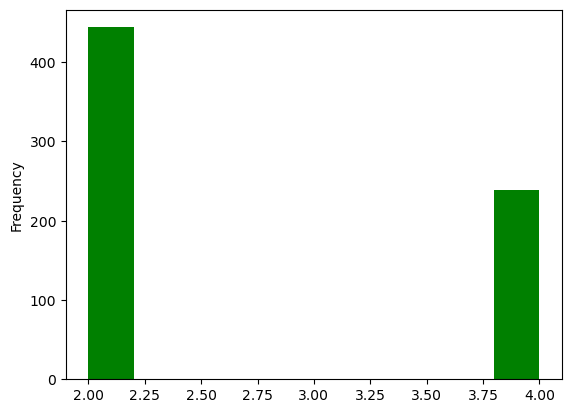

In [73]:
dataset['sinif'].plot(kind='hist',color='green')
dataset['sinif'].value_counts()

In [74]:
# sinif sutununda bulunan 2 ve 4 değerleri 2(iyi huylu)-->0 ve 4(kötü huylu)-->1 olucak şekilde değiştirildi.
dataset['sinif'] = dataset['sinif'].replace(2, 0)
dataset['sinif'] = dataset['sinif'].replace(4, 1)

0    444
1    239
Name: sinif, dtype: int64

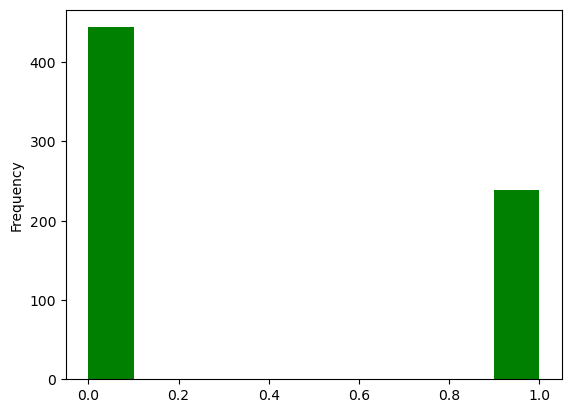

In [75]:
dataset['sinif'].plot(kind='hist',color='green')
dataset['sinif'].value_counts()

numara                   -0.084701
mitoz                     0.423448
tek_epitel_hucre_boyut    0.690958
marjinal_yapisma          0.706294
yigin_kalinligi           0.714790
normal_nukleoli           0.718677
yumusak_kromatin          0.758228
hucre_boyutu_esbicim      0.820801
hucre_sekil_esbicim       0.821891
ciplak_cekirdekler        0.822696
sinif                     1.000000
Name: sinif, dtype: float64

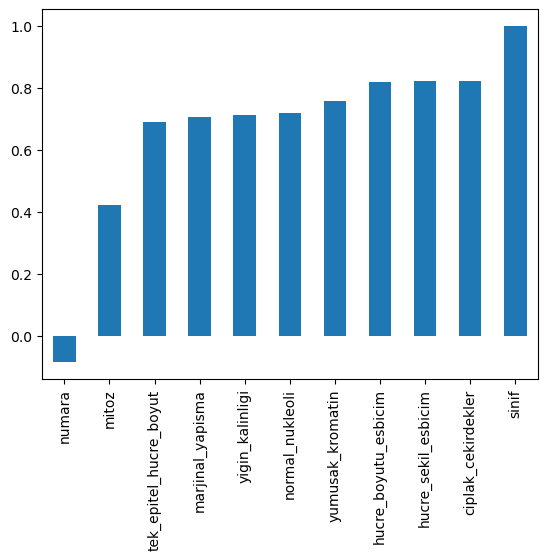

In [76]:
da
dataset.corr()["sinif"].sort_values().plot(kind="bar")
dataset.corr()["sinif"].sort_values()

In [78]:
dataset.to_csv("breastCancer_processed.csv",index=False)